## 1. Import necessasry librabries

In [1]:
import pandas as pd

## 2. Import data

In [2]:
cars_data = pd.read_csv('Cars.csv')
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


## 3. Data Understanding

### 3.1 Initial Analysis

In [3]:
cars_data.shape

(81, 5)

In [4]:
cars_data.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [5]:
cars_data.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

### 3.2 Assumption Check

#### =======================================================================================================

### Reference data for understanding the Assumptions better

In [6]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [7]:
cars_data.shape

(81, 5)

In [8]:
n_observations = 81
X = np.random.randn(n_observations)
y = X * 10 + np.random.randn(n_observations) * 2

In [9]:
demo_data = pd.DataFrame(data = [X,y]).T
demo_data.columns = ['X','y']
demo_data

,X,y
0,0.754886,4.826150
1,0.430967,3.721025
2,0.143919,1.854724
3,-1.017543,-9.880081
4,-0.383912,-3.097764
...,...,...
76,-0.565750,-1.859978
77,1.233012,12.122573
78,1.006075,8.258853
79,-0.713671,-8.661214


### 1. Check for Linearity - Passed

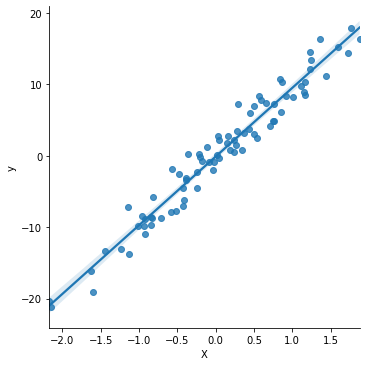

In [10]:
sns.lmplot(x='X',y='y',data=demo_data)
plt.show()

### 2. Check for Normality - Passed

* Distplot
* qqplot

In [11]:
import warnings
warnings.filterwarnings('ignore')

#### Normality check with Distplot

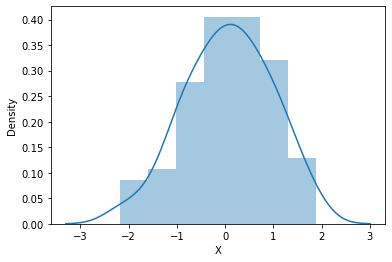

In [12]:
sns.distplot(a = demo_data['X'])
plt.show()

#### Normality check with qqplot/probplot

In [13]:
from scipy import stats

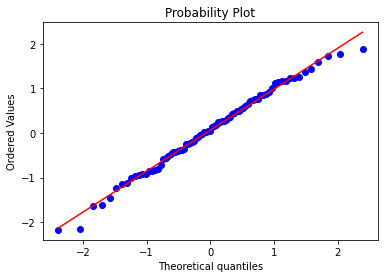

In [14]:
stats.probplot(x = demo_data['X'],dist='norm',plot=plt)
plt.show()

### 3. No Multicollinearity - Passed

It can be checked with Correlation Matrix.

### 4. No Homoscedasticity - Passed

#### Note: 

* This can be checked post model training.
* All the input features should be in similar scale for this test.

#### Model Building

1. Separate input and output features
2. We go for train test split.

In [15]:
X = demo_data[['X']]
y = demo_data[['y']]

#### Model Training

In [16]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X,y) #Training

LinearRegression()

#### Model Testing

In [17]:
y_pred_demo = linear_model.predict(X)

#### Now let's check for Homoscedasticity

In [18]:
y

,y
0,4.826150
1,3.721025
2,1.854724
3,-9.880081
4,-3.097764
...,...
76,-1.859978
77,12.122573
78,8.258853
79,-8.661214


In [19]:
y_pred_demo

array([[  7.16604801],
       [  4.05055495],
       [  1.28968573],
       [ -9.88140247],
       [ -3.78706189],
       [ 17.96279036],
       [  0.31678213],
       [  1.39401853],
       [-14.00732521],
       [  3.16450545],
       [  8.02337788],
       [ -7.94705651],
       [ -0.4283082 ],
       [-10.95703448],
       [ -2.48382555],
       [-20.79007702],
       [ -8.99186406],
       [  4.17120368],
       [  2.40817833],
       [  2.5880921 ],
       [ -4.18185437],
       [ -4.05535064],
       [ 16.46248906],
       [-11.12369211],
       [  0.35223284],
       [  0.17561433],
       [ 11.16668333],
       [  0.05899813],
       [ -0.30931592],
       [ -8.21064672],
       [  5.07116149],
       [  2.23062743],
       [ -5.12979172],
       [ -1.19796496],
       [ -5.70283828],
       [  5.64289686],
       [  2.71791324],
       [-11.92552055],
       [ 12.99415858],
       [ 11.68461554],
       [  7.19232529],
       [  8.70454085],
       [  2.20606277],
       [  1

In [20]:
#error = actual output - predicted
error = y - y_pred_demo
error

,y
0,-2.339898
1,-0.329530
2,0.565038
3,0.001322
4,0.689298
...,...
76,3.676022
77,0.357843
78,-1.323162
79,-1.702493


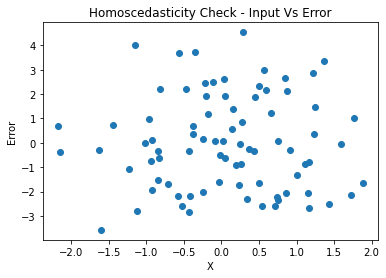

In [21]:
plt.scatter(x = demo_data['X'],y = error)
plt.xlabel('X')
plt.ylabel('Error')
plt.title('Homoscedasticity Check - Input Vs Error')
plt.show()

### 5. No Autoregression - Passed

### 6. Check for Zero Residual Mean - Passed

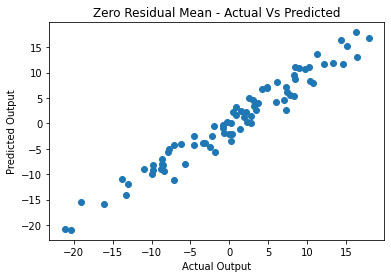

In [22]:
plt.scatter(x = y,y = y_pred_demo)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Zero Residual Mean - Actual Vs Predicted')
plt.show()

### =======================================================================================

### 3.2 Assumption Check for Cars data

#### 1. Check for Linearity

In [23]:
cars_data.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


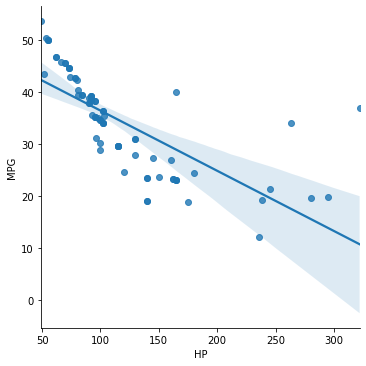

In [24]:
sns.lmplot(x = 'HP',y = 'MPG',data=cars_data)
plt.show()

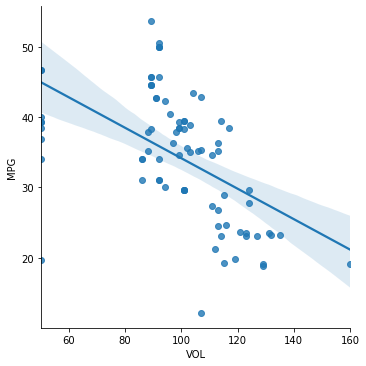

In [25]:
sns.lmplot(x = 'VOL',y = 'MPG',data=cars_data)
plt.show()

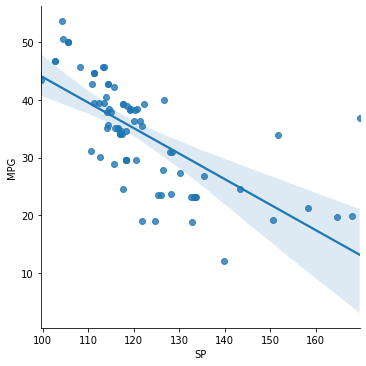

In [26]:
sns.lmplot(x = 'SP',y = 'MPG',data=cars_data)
plt.show()

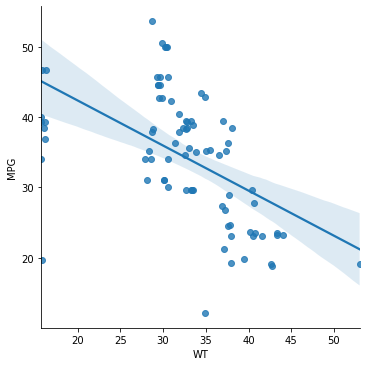

In [27]:
sns.lmplot(x = 'WT',y = 'MPG',data=cars_data)
plt.show()

#### Observation - None of my input features is linearly related with the output. Linearity Test failed.

### 2. Check for Normality

#### Normality Test with Distplot

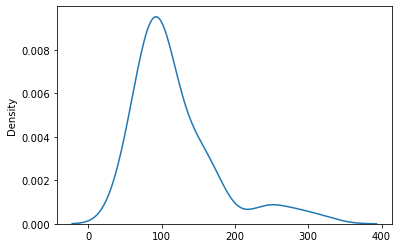

In [28]:
sns.distplot(x = cars_data['HP'],hist=False)
plt.show()

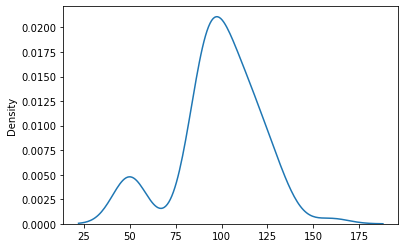

In [29]:
sns.distplot(x = cars_data['VOL'],hist=False)
plt.show()

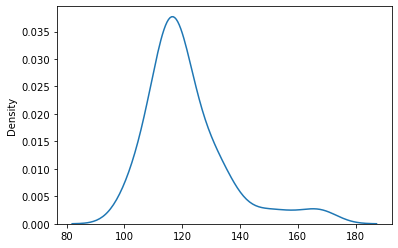

In [30]:
sns.distplot(x = cars_data['SP'],hist=False)
plt.show()

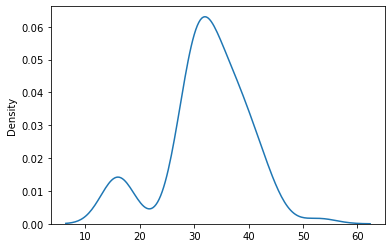

In [31]:
sns.distplot(x = cars_data['WT'],hist=False)
plt.show()

#### Observation - None of my input features is following the property of Normal Distribution. Normality Test failed.

#### Normality Test with qqplot

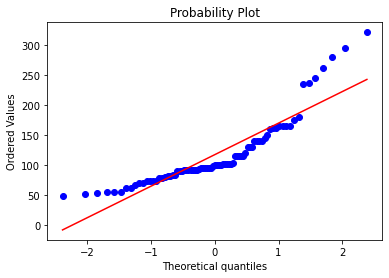

In [32]:
stats.probplot(x = cars_data['HP'],dist='norm',plot=plt)
plt.show()

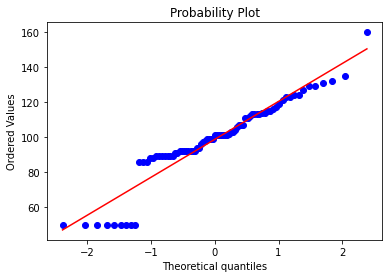

In [33]:
stats.probplot(x = cars_data['VOL'],dist='norm',plot=plt)
plt.show()

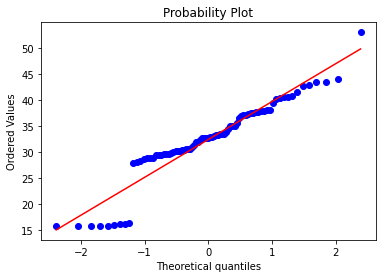

In [34]:
stats.probplot(x = cars_data['WT'],dist='norm',plot=plt)
plt.show()

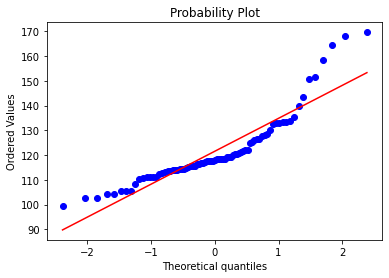

In [35]:
stats.probplot(x = cars_data['SP'],dist='norm',plot=plt)
plt.show()

#### Observation - None of my input features is following the property of Normal Distribution. Normality Test failed.

### 3. Check for Multicollinearity

In [36]:
corr_matrix = cars_data.corr().round(2)
corr_matrix

,HP,MPG,VOL,SP,WT
HP,1.00,-0.73,0.08,0.97,0.08
MPG,-0.73,1.00,-0.53,-0.69,-0.53
VOL,0.08,-0.53,1.00,0.10,1.00
SP,0.97,-0.69,0.10,1.00,0.10
WT,0.08,-0.53,1.00,0.10,1.00


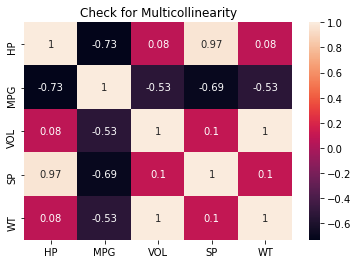

In [37]:
sns.heatmap(data = corr_matrix,annot=True)
plt.title('Check for Multicollinearity')
plt.show()

#### Observation - 

* Collinearity between SP & HP.
* Collinearity between VOL & WT.

##### Note: We have to treat it properly before we build the model.

### 4. No Autoregression - Passed.

### 5. Homoscedasticity Check

#### Note: 

* This can be checked post model training.
* All the input features should be in similar scale for this test.

#### 5.1 Make all the input features in a similar Scale

Techniques are:

* Standard Scaler - Mean = 0, SD = 1.
* MinMax Scaler   - 0 to 1
* Robust Scaler   - (Self Exploration)

##### Model Building

In [38]:
X = cars_data.drop(labels='MPG',axis=1)
y = cars_data[['MPG']]

In [39]:
X

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [40]:
X.mean()

HP     117.469136
VOL     98.765432
SP     121.540272
WT      32.412577
dtype: float64

In [41]:
X.std()

HP     57.113502
VOL    22.301497
SP     14.181432
WT      7.492813
dtype: float64

In [42]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_X = std_scaler.fit_transform(X)
print(scaled_X)

[[-1.20629511 -0.44061061 -1.23140253 -0.49023816]
 [-1.1005866  -0.30525236 -1.14087145 -0.26129934]
 [-1.1005866  -0.30525236 -1.14087145 -0.29799301]
 [-0.83631531 -0.30525236 -0.57323872 -0.2391033 ]
 [-1.13582277 -0.30525236 -1.21182554 -0.33887816]
 [-0.83631531 -0.44061061 -0.59281571 -0.37881419]
 [-1.1005866  -0.30525236 -1.14087145 -0.28256505]
 [-0.97726    -2.20026792 -1.34399532 -2.22453536]
 [-0.97726    -2.20026792 -1.34399532 -2.15581433]
 [-0.66013445 -0.21501352 -0.4182792  -0.20042158]
 [-0.78346105 -0.44061061 -0.73472389 -0.40949027]
 [-0.44871742 -2.20026792 -0.27968395 -2.23718888]
 [-0.44871742  0.01058357  0.04007367  0.05385348]
 [-0.78346105 -0.44061061 -0.73472389 -0.40746314]
 [-0.90678765 -0.44061061 -0.94758617 -0.41164734]
 [-0.78346105 -0.44061061 -0.73472389 -0.37710085]
 [-0.69537062 -0.35037178 -0.50881029 -0.38633253]
 [-0.44871742 -2.20026792 -0.27968395 -2.17802125]
 [-0.69537062 -0.35037178 -0.50881029 -0.33347355]
 [-0.48395359  0.19106124 -0.21

In [43]:
scaled_X = pd.DataFrame(data = scaled_X,columns = ['HP','VOL','SP','WT'])
scaled_X

,HP,VOL,SP,WT
0,-1.206295,-0.440611,-1.231403,-0.490238
1,-1.100587,-0.305252,-1.140871,-0.261299
2,-1.100587,-0.305252,-1.140871,-0.297993
3,-0.836315,-0.305252,-0.573239,-0.239103
4,-1.135823,-0.305252,-1.211826,-0.338878
...,...,...,...,...
76,3.603442,-2.200268,3.409929,-2.186236
77,2.123523,0.732494,2.060245,0.740025
78,2.563975,-2.200268,2.132755,-2.235028
79,3.127754,0.912972,3.292567,0.941462


In [44]:
scaled_X.mean() #Mean = 0

HP    -1.041691e-16
VOL    5.825244e-17
SP     1.274701e-15
WT     1.170531e-15
dtype: float64

In [45]:
scaled_X.std() #STD = 1

HP     1.006231
VOL    1.006231
SP     1.006231
WT     1.006231
dtype: float64

##### Model Training

In [46]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(scaled_X,y) #Training

LinearRegression()

In [47]:
linear_model.intercept_

array([34.42207573])

In [48]:
linear_model.coef_

array([[-11.66095549,  -7.44803145,   5.57581553,   2.98284187]])

#### Model Testing

In [49]:
y_pred_cars = linear_model.predict(scaled_X)
y_pred_cars

array([[43.44193477],
       [42.38879289],
       [42.27934147],
       [42.53835981],
       [42.17264802],
       [43.02061916],
       [42.32536062],
       [48.07621852],
       [48.28120247],
       [40.79122814],
       [41.52153227],
       [47.80956747],
       [39.95980269],
       [41.52757889],
       [41.76632332],
       [41.6181448 ],
       [41.15094046],
       [47.98605515],
       [41.30861046],
       [37.87127922],
       [38.57706414],
       [37.35199705],
       [37.89770285],
       [39.5625144 ],
       [39.93380662],
       [46.73870908],
       [35.48165898],
       [38.78152504],
       [38.24861192],
       [36.00285298],
       [34.84603989],
       [37.21630246],
       [37.13919796],
       [34.82541399],
       [37.22361389],
       [37.53950097],
       [39.27144845],
       [38.24219888],
       [38.54286458],
       [35.9391722 ],
       [34.2129755 ],
       [35.36313259],
       [37.50473376],
       [38.07998482],
       [35.79651664],
       [36

In [50]:
error = y - y_pred_cars
error

,MPG
0,10.258747
1,7.624608
2,7.734060
3,3.157963
4,8.331584
...,...
76,15.617904
77,1.298838
78,7.863547
79,7.517122


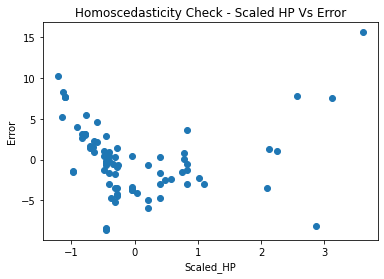

In [51]:
plt.scatter(x = scaled_X['HP'],y = error)
plt.title('Homoscedasticity Check - Scaled HP Vs Error')
plt.xlabel('Scaled_HP')
plt.ylabel('Error')
plt.show()

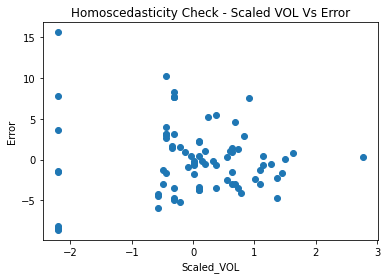

In [52]:
plt.scatter(x = scaled_X['VOL'],y = error)
plt.title('Homoscedasticity Check - Scaled VOL Vs Error')
plt.xlabel('Scaled_VOL')
plt.ylabel('Error')
plt.show()

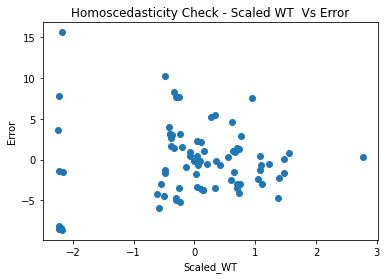

In [53]:
plt.scatter(x = scaled_X['WT'],y = error)
plt.title('Homoscedasticity Check - Scaled WT  Vs Error')
plt.xlabel('Scaled_WT')
plt.ylabel('Error')
plt.show()

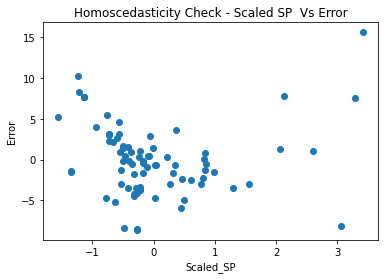

In [54]:
plt.scatter(x = scaled_X['SP'],y = error)
plt.title('Homoscedasticity Check - Scaled SP  Vs Error')
plt.xlabel('Scaled_SP')
plt.ylabel('Error')
plt.show()

### Observation - None of my input features follows Homoscedascity, So this test also fails.

### 6. Test for Zero Residual Mean - Actual Vs Predicted

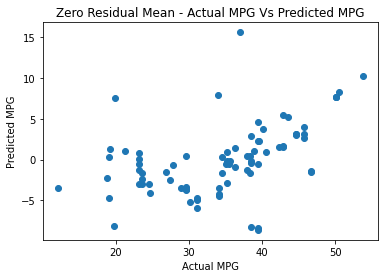

In [55]:
plt.scatter(x = cars_data['MPG'],y = error)
plt.title('Zero Residual Mean - Actual MPG Vs Predicted MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()

#### Observation - Test for Zero Residual Mean also fails.

### =====================================================================================

### Linear Regression with Statsmodels for Evaluation

In [57]:
import statsmodels.formula.api as smf
lin_model = smf.ols('MPG ~ HP + SP + VOL + WT',data = cars_data).fit()

In [58]:
lin_model.params

Intercept    30.677336
HP           -0.205444
SP            0.395627
VOL          -0.336051
WT            0.400574
dtype: float64

In [59]:
lin_model.pvalues #P-val speaks about whether the input feature is significant or not at 5%.

Intercept    0.042936
HP           0.000001
SP           0.014579
VOL          0.556294
WT           0.813649
dtype: float64

## =====================================================================

### Hypothesis Formula

##### H0: It is not a signifacant parameter.
##### Ha: It is a significant parameter.

## =====================================================================

In [63]:
print('R2 score : ',lin_model.rsquared)
print('Adjusted R2 score: ',lin_model.rsquared_adj) 
#It speaks about the overall contribution of the input features for the prediction.

R2 score :  0.7705372737359844
Adjusted R2 score:  0.7584602881431415


### Understanding R2 and Adjusted R2

In [74]:
model_1 = smf.ols('MPG ~ HP',data = cars_data).fit()
print('R2 score          : ',round(model_1.rsquared,4))
print('Adjusted R2 score : ',round(model_1.rsquared_adj,4))
print('AIC value         : ',round(model_1.aic,4)) 
print('BIC value         : ',round(model_1.bic,4))
#when performing model selection, the one with the lowest AIC or BIC is preferred.

R2 score          :  0.5257
Adjusted R2 score :  0.5197
AIC value         :  530.7453
BIC value         :  535.5342


In [73]:
model_2 = smf.ols('MPG ~ HP + SP',data = cars_data).fit()
print('R2 score          : ',round(model_2.rsquared,4))
print('Adjusted R2 score : ',round(model_2.rsquared_adj,4))
print('AIC value         : ',round(model_2.aic,4))
print('BIC value         : ',round(model_2.bic,4))

R2 score          :  0.5326
Adjusted R2 score :  0.5207
AIC value         :  531.5481
BIC value         :  538.7315


In [75]:
model_3 = smf.ols('MPG ~ HP + SP + VOL',data = cars_data).fit()
print('R2 score          : ',round(model_3.rsquared,4))
print('Adjusted R2 score : ',round(model_3.rsquared_adj,4))
print('AIC value         : ',round(model_3.aic,4))
print('BIC value         : ',round(model_3.bic,4))

R2 score          :  0.7704
Adjusted R2 score :  0.7614
AIC value         :  475.9875
BIC value         :  485.5653


In [76]:
model_4 = smf.ols('MPG ~ HP + SP + VOL + WT',data = cars_data).fit()
print('R2 score          : ',round(model_4.rsquared,4))
print('Adjusted R2 score : ',round(model_4.rsquared_adj,4))
print('AIC value         : ',round(model_4.aic,4))
print('BIC value         : ',round(model_4.bic,4))

R2 score          :  0.7705
Adjusted R2 score :  0.7585
AIC value         :  477.9279
BIC value         :  489.9002


In [77]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     87.55
Date:                Sun, 07 Nov 2021   Prob (F-statistic):           1.96e-14
Time:                        12:42:22   Log-Likelihood:                -263.37
No. Observations:                  81   AIC:                             530.7
Df Residuals:                      79   BIC:                             535.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.0392      1.616     29.722      0.000      44.822      51.256
HP            -0.1159      0.012     -9.357      0.000      -0.141      -0.091
==============================================================================
Omnibus:                       20.653   Durbin-Watson:                   1.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.053
Skew:                           0.949   Prob(JB):                     9.00e-09
Kurtosis:                       5.716   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     44.45
Date:                Sun, 07 Nov 2021   Prob (F-statistic):           1.31e-13
Time:                        12:44:09   Log-Likelihood:                -262.77
No. Observations:                  81   AIC:                             531.5
Df Residuals:                      78   BIC:                             538.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.0209     20.495      1.270      0.208     -14.782      66.824
HP            -0.1731      0.054     -3.178      0.002      -0.282      -0.065
SP             0.2364      0.219      1.078      0.285      -0.200       0.673
==============================================================================
Omnibus:                       27.260   Durbin-Watson:                   1.215
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.523
Skew:                           1.214   Prob(JB):                     1.45e-12
Kurtosis:                       6.204   Cond. No.                     5.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Sun, 07 Nov 2021   Prob (F-statistic):           1.56e-24
Time:                        12:44:30   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
SP             0.4007      0.156      2.571      0.012       0.090       0.711
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Sun, 07 Nov 2021   Prob (F-statistic):           1.54e-23
Time:                        12:44:45   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
SP             0.3956      0.158      2.500      0.015       0.080       0.711
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
model_1 = smf.ols('MPG ~ VOL',data = cars_data).fit()

In [82]:
model_1.pvalues

Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64

In [83]:
model_5 = smf.ols('MPG ~ WT',data = cars_data).fit()
model_5.pvalues

Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64

In [84]:
model_5 = smf.ols('MPG ~ WT + VOL',data = cars_data).fit()
model_5.pvalues

Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64

### =====================================================================================

### With sklearn library

In [85]:
X

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [86]:
y

,MPG
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232
...,...
76,36.900000
77,19.197888
78,34.000000
79,19.833733


#### Model Training

In [87]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X,y)

LinearRegression()

#### Model Testing

In [89]:
y_pred = lr_model.predict(X)

#### Model Evaluation

In [90]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [92]:
mean_squared_error(y,y_pred) #No outliers

18.89714115234311

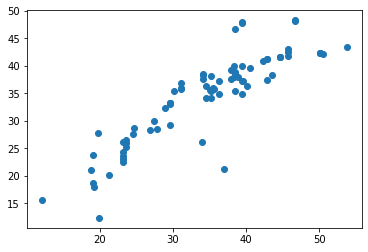

In [94]:
plt.scatter(cars_data['MPG'],y_pred)
plt.show()

In [95]:
mean_absolute_error(y,y_pred) #Presence of outliers

3.2679682854208005

### =====================================================================================

## Model Improvement Techniques

## TAKEAWAY:

Here wrt to few datapoints, it is evident that most of the input features are not showing direct linear relationship with output varible. So we have to do some transformations to make to linear.

#### Data transformation techniques if the data is CONTINUOUS:

* Log Transformation
* Square Root Transformation
* Cube Root Transformation
* Reciprocal Transformation
* Boxcox Transformation
* Standard Scaler
* Min Max Scaler
* Robust Scaler

### Data transformation techniques if the data is DISCRETE:

* Label Encoding
* One Hot Encoding

#### Apply Log transformation

#### Why? To make the input linearly related with the output

In [96]:
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [97]:
X

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [101]:
cars_data_2 = cars_data.copy()
cars_data_2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [114]:
import numpy as np
cars_data_2['log_HP']  = np.log(cars_data_2['HP'])
cars_data_2['sqrt_HP'] = np.sqrt(cars_data_2['HP'])
cars_data_2['log_VOL'] = np.log(cars_data_2['VOL'])
cars_data_2['log_SP']  = np.log(cars_data_2['SP'])
cars_data_2['log_WT']  = np.log(cars_data_2['WT'])
cars_data_2

,HP,MPG,VOL,SP,WT,log_HP,log_VOL,log_SP,log_WT,sqrt_HP
0,49,53.700681,89,104.185353,28.762059,3.891820,4.488636,4.646172,3.359057,7.000000
1,55,50.013401,92,105.461264,30.466833,4.007333,4.521789,4.658344,3.416639,7.416198
2,55,50.013401,92,105.461264,30.193597,4.007333,4.521789,4.658344,3.407630,7.416198
3,70,45.696322,92,113.461264,30.632114,4.248495,4.521789,4.731461,3.422049,8.366600
4,53,50.504232,92,104.461264,29.889149,3.970292,4.521789,4.648816,3.397495,7.280110
...,...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552,3.912023,5.133434,2.780864,17.944358
77,238,19.197888,115,150.576579,37.923113,5.472271,4.744932,5.014472,3.635561,15.427249
78,263,34.000000,50,151.598513,15.769625,5.572154,3.912023,5.021236,2.758086,16.217275
79,295,19.833733,119,167.944460,39.423099,5.686975,4.779123,5.123633,3.674352,17.175564


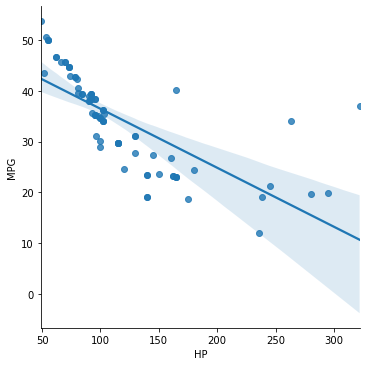

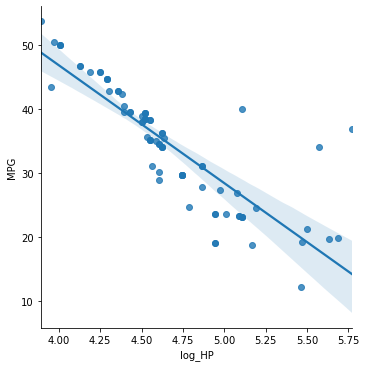

In [106]:
sns.lmplot(x='HP',y='MPG',data=cars_data_2)
sns.lmplot(x='log_HP',y='MPG',data=cars_data_2)
plt.show()

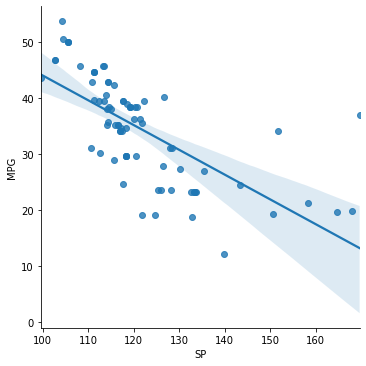

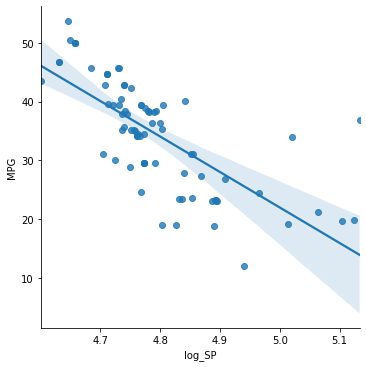

In [107]:
sns.lmplot(x='SP',y='MPG',data=cars_data_2)
sns.lmplot(x='log_SP',y='MPG',data=cars_data_2)
plt.show()

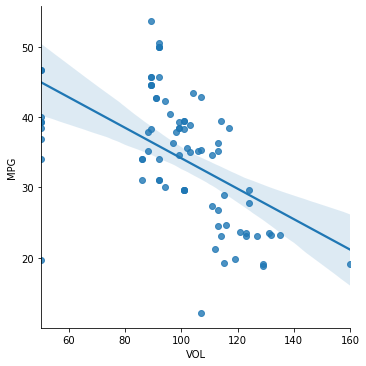

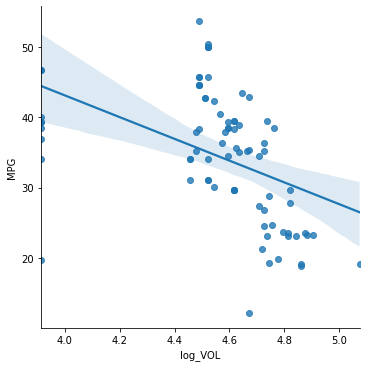

In [108]:
sns.lmplot(x='VOL',y='MPG',data=cars_data_2)
sns.lmplot(x='log_VOL',y='MPG',data=cars_data_2)
plt.show()

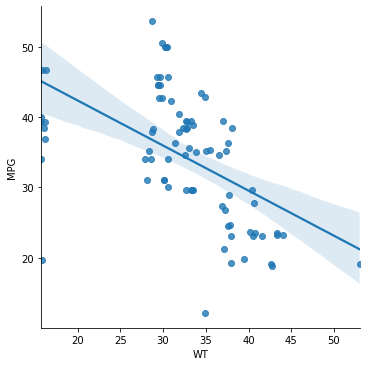

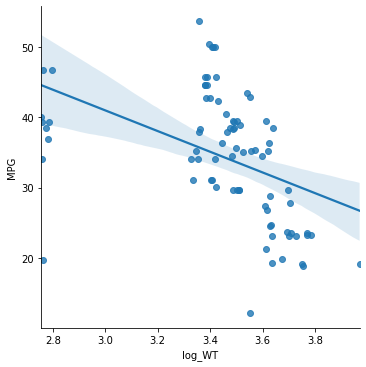

In [109]:
sns.lmplot(x='WT',y='MPG',data=cars_data_2)
sns.lmplot(x='log_WT',y='MPG',data=cars_data_2)
plt.show()

### Understanding R2 and Adjusted R2

In [110]:
model_1 = smf.ols('MPG ~ log_HP',data = cars_data_2).fit()
print('R2 score          : ',round(model_1.rsquared,4))
print('Adjusted R2 score : ',round(model_1.rsquared_adj,4))
print('AIC value         : ',round(model_1.aic,4)) 
print('BIC value         : ',round(model_1.bic,4))
#when performing model selection, the one with the lowest AIC or BIC is preferred.

R2 score          :  0.7114
Adjusted R2 score :  0.7078
AIC value         :  490.4986
BIC value         :  495.2875


In [111]:
model_2 = smf.ols('MPG ~ log_HP + log_SP',data = cars_data_2).fit()
print('R2 score          : ',round(model_2.rsquared,4))
print('Adjusted R2 score : ',round(model_2.rsquared_adj,4))
print('AIC value         : ',round(model_2.aic,4))
print('BIC value         : ',round(model_2.bic,4))

R2 score          :  0.8079
Adjusted R2 score :  0.803
AIC value         :  459.5115
BIC value         :  466.6948


In [112]:
model_3 = smf.ols('MPG ~ log_HP + log_SP + log_VOL',data = cars_data_2).fit()
print('R2 score          : ',round(model_3.rsquared,4))
print('Adjusted R2 score : ',round(model_3.rsquared_adj,4))
print('AIC value         : ',round(model_3.aic,4))
print('BIC value         : ',round(model_3.bic,4))

R2 score          :  0.9111
Adjusted R2 score :  0.9077
AIC value         :  399.1035
BIC value         :  408.6813


In [113]:
model_4 = smf.ols('MPG ~ log_HP + log_SP + log_VOL + log_WT',data = cars_data_2).fit()
print('R2 score          : ',round(model_4.rsquared,4))
print('Adjusted R2 score : ',round(model_4.rsquared_adj,4))
print('AIC value         : ',round(model_4.aic,4))
print('BIC value         : ',round(model_4.bic,4))

R2 score          :  0.9118
Adjusted R2 score :  0.9071
AIC value         :  400.5013
BIC value         :  412.4736


### EXPLORE - THE LOG TRANSFORMED FEATURES FOR PREDICTION AND CHECK WHETHER THE MSE is good.